In [1]:
# module import
import pystan
import numpy as np
import pylab as py
import pandas as pd
%matplotlib inline

In [2]:
seven_scientists_code="""
data {
    int<lower=0> n; // number of scientists
    real sample[n]; // measurements
}
parameters {
    real mu;
    real<lower=0> lambda[n];
}
transformed parameters {
    real<lower=0> sigma[n];
    for (i in 1:n)
        sigma[i] <- 1 / sqrt(lambda[i]);
}
model {
    for (i in 1:n)
        lambda[i] ~ gamma(0.01, 0.01);
    mu ~ normal(0, 30);
    for (i in 1:n)
        sample[i] ~ normal(mu, sigma[i]);
}
"""

%time scientists_model = pystan.StanModel(model_code=seven_scientists_code)

CPU times: user 1.03 s, sys: 32 ms, total: 1.06 s
Wall time: 34.8 s


In [3]:
sample = [-27.020,3.570,8.191,9.898,9.603,9.945,10.056]
scientists_dat = {
    'n': len(sample),
    'sample': sample
}

niter = 20000

%time fit = scientists_model.sampling(data=scientists_dat, iter=niter, chains=4, n_jobs=4, thin=4)
print(fit)

CPU times: user 20 ms, sys: 16 ms, total: 36 ms
Wall time: 927 ms
Inference for Stan model: anon_model_a185a84e10dafd4a5e48ed19e053387f.
4 chains, each with iter=20000; warmup=10000; thin=4; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu          9.86  4.7e-3   0.22   9.38   9.78   9.89   9.99   10.2   2248    1.0
lambda[0] 7.5e-4  1.8e-5 1.0e-3 7.9e-7 8.5e-5 3.6e-4 1.0e-3 3.6e-3   3334    1.0
lambda[1]   0.03  6.4e-4   0.04 2.5e-5 2.6e-3   0.01   0.03   0.13   3230    1.0
lambda[2]   0.45    0.03   1.33 3.2e-4   0.04   0.17   0.51   2.15   2161    1.0
lambda[3]  31.56    0.88  50.58   0.03   2.38   12.0  38.11 178.79   3271    1.0
lambda[4]  14.32    0.53  29.89 9.9e-3   0.94   4.22  14.31  95.74   3211    1.0
lambda[5]  31.03     0.9  50.95   0.02   2.25  11.17  37.43 180.51   3231    1.0
lambda[6]  24.19    0.75  43.07   0.02    1.6   7.85  28.15 146.38   3255    1.0
sigma[0]  306

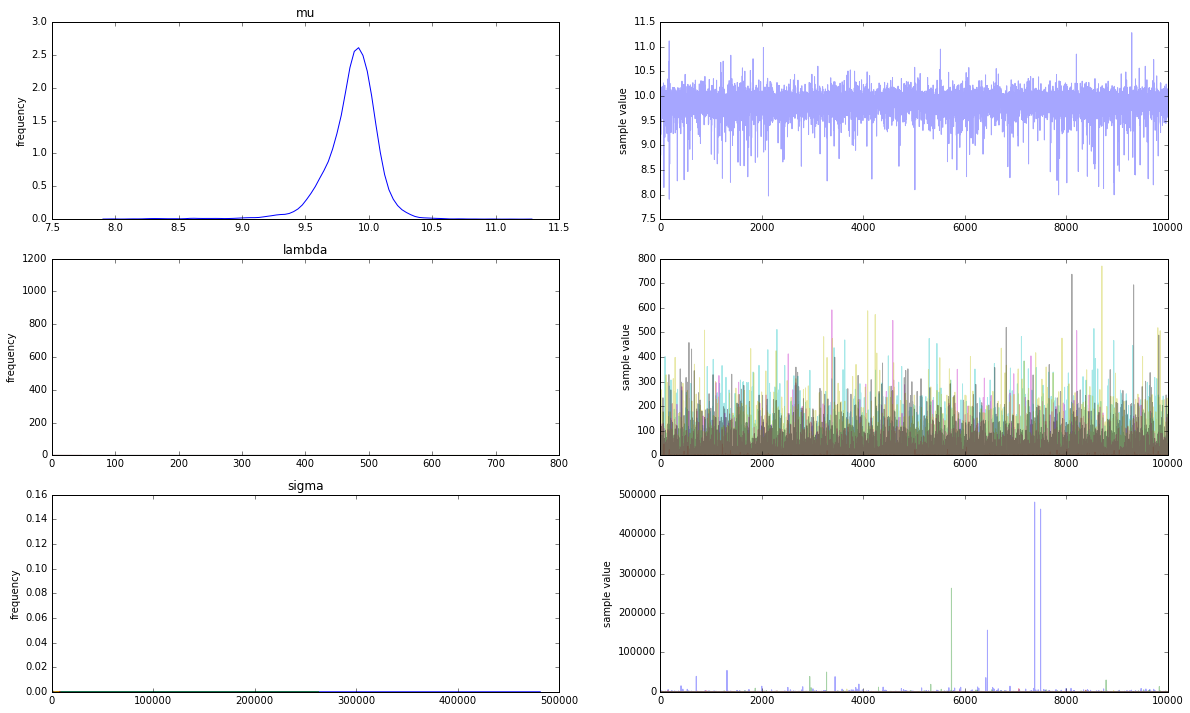

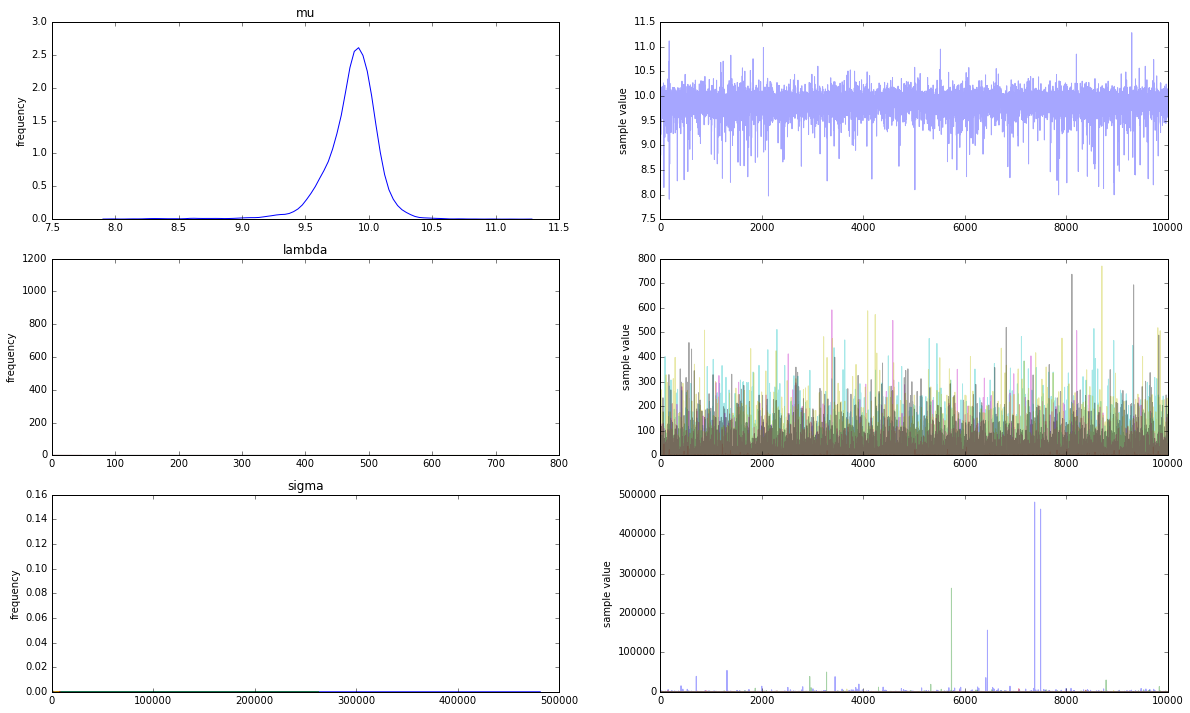

In [4]:
from IPython.core.pylabtools import figsize
figsize(20, 12)

fit.plot()